# **CHELAOUA Naila G2 IASD**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage import convolve
from skimage import io, img_as_float
import cv2


(-0.5, 1023.5, 1023.5, -0.5)

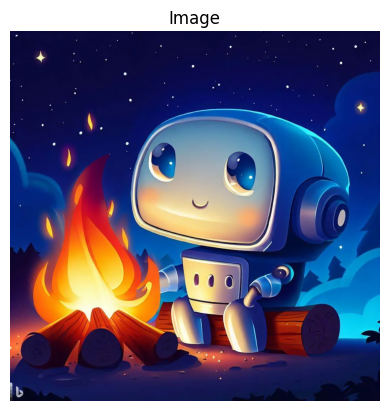

In [2]:
#Load the image using matplotlib
image = mpimg.imread('/kaggle/input/input-images/img.jpg')

plt.imshow(image)
plt.title('Image')
plt.axis('off') 

# Mean Filter:

In [3]:
# Step 2: Define a 3x3 mean filter kernel
G1 = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]]) / 9


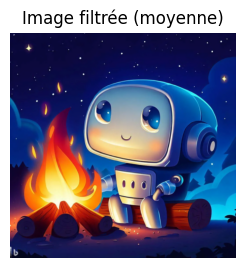

In [4]:
# Appliquer le filtre de moyenne à chaque canal  R, G, B
filtered_image = np.zeros_like(image)
for i in range(3):  # Boucle sur chaque canal R, G, B
    filtered_image[:, :, i] = convolve(image[:, :, i], G1)

# Afficher l'image filtrée


plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Image filtrée (moyenne)')
plt.axis('off')
plt.show()

What happens is that the image becomes blurred, with less detail and reduced noise, as the pixel values are averaged within the 3x3 neighborhood.

# Define the Kernels G2 G3


In [5]:
# G2: Multiply by 2 kernel (brighter filter)
G2 = np.ones((3, 3)) * 2

# G1: Mean filter (blurring filter, 3x3)
G1 = np.ones((3, 3)) / 9

# G3: Sharpening filter (G3 = G2 - G1)
G3 = G2 - G1


In [6]:
# Apply the G2 filter (brightening)
brightened_image = cv2.filter2D(image, -1, G2)

# Apply the G1 filter (blurring)
blurred_image = cv2.filter2D(image, -1, G1)

# Apply the G3 filter (sharpening)
sharpened_image = cv2.filter2D(image, -1, G3)


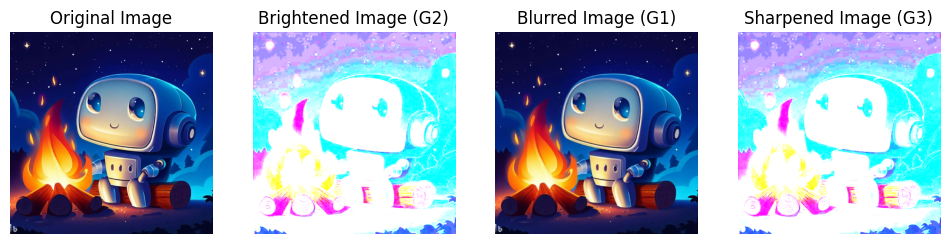

In [7]:
# Display the original and filtered images
plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(brightened_image)
plt.title("Brightened Image (G2)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(blurred_image)
plt.title("Blurred Image (G1)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sharpened_image)
plt.title("Sharpened Image (G3)")
plt.axis('off')

plt.show()


Brightened Image (G2): The image will be made brighter by multiplying each pixel by 2.

Blurred Image (G1): The image will be blurred using the mean filter.

Sharpened Image (G3): The image will be sharpened by enhancing the edges (a combination of G2 and G1)

In [8]:
# Define the G4 filter
G4 = np.array([[-1, -1,  0],
               [-1,  3,  0],
               [ 0,  0,  0]])


In [9]:
# Apply the G4 filter to the image
filtered_image_G4 = cv2.filter2D(image, -1, G4)


In [10]:
# Add 0.5 to the resulting image to fix the black appearance
adjusted_image = np.clip(filtered_image_G4 + 0.5, 0, 255).astype(np.uint8)


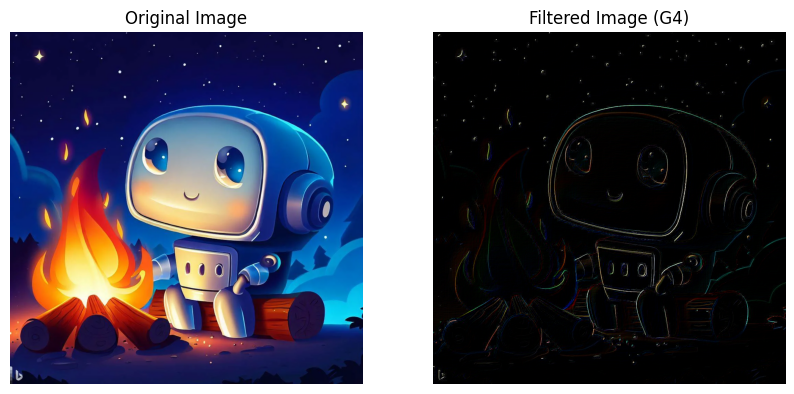

In [11]:
# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image)
plt.title("Filtered Image (G4)")
plt.axis('off')

plt.show()


In [12]:
# Appliquer à nouveau le filtre G1 (deuxième application)
blurred_image_twice = cv2.filter2D(filtered_image, -1, G1)


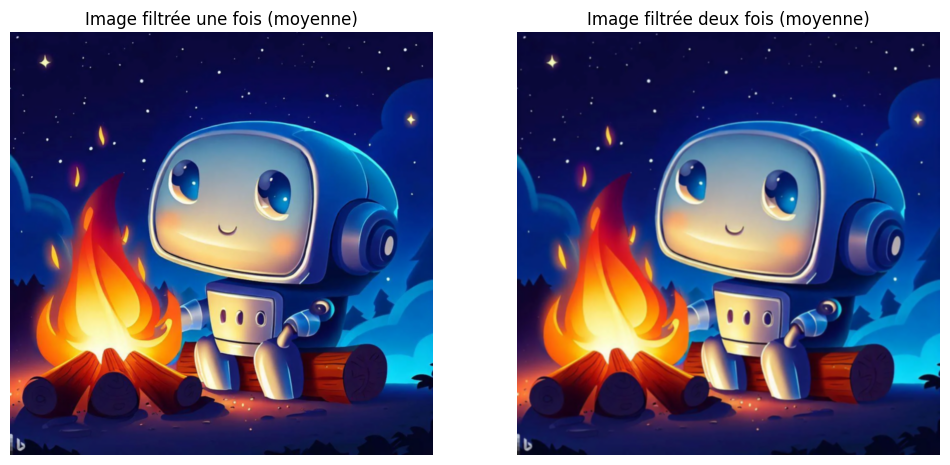

In [13]:
# Afficher l'image filtrée une fois et deux fois
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image)
plt.title('Image filtrée une fois (moyenne)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_twice)
plt.title('Image filtrée deux fois (moyenne)')
plt.axis('off')

plt.show()

In [14]:
# Sobel Filter for Horizontal Edges (Gx)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Sobel Filter for Vertical Edges (Gy)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Convert to uint8 for visualization
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)


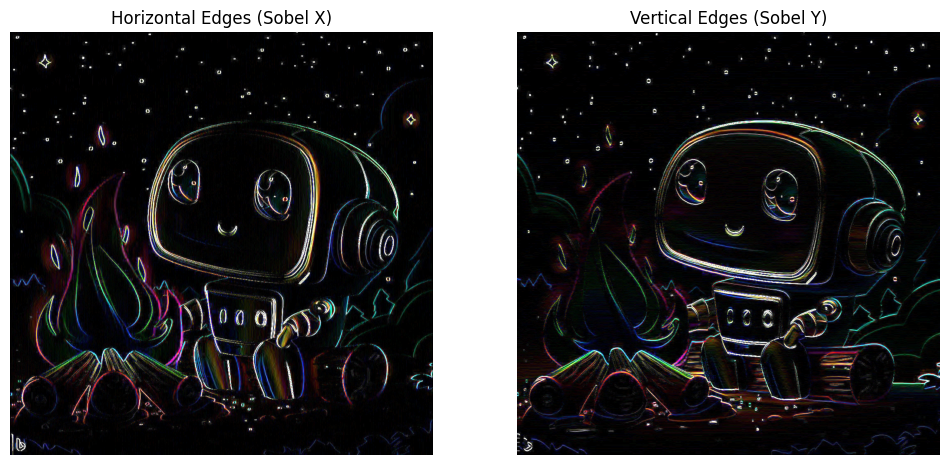

In [15]:
# Display Sobel Filters for Horizontal and Vertical Edges
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sobel_x)
plt.title("Horizontal Edges (Sobel X)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_y)
plt.title("Vertical Edges (Sobel Y)")
plt.axis('off')

plt.show()

